# <u>PRACTICAL - 5</u>

## <u>QUESTION</u> -

### Perform CluStream algorithm on any time series data from Kaggle and compare its output with that of K-means clustering. Evaluate the cluster quality by changing the algorithm's parameters. 

### <u>DATASET</u> -> Crude Oil Stock Dataset 2000-2024 (https://www.kaggle.com/datasets/mhassansaboor/crude-oil-stock-dataset-2000-2024)

In [1]:
# Import Libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [2]:
# Import Dataset

file_path="Crude_Oil_Data.csv" 
df=pd.read_csv(file_path)

In [3]:
df

,Date,Adj_Close,Close,High,Low,Open,Volume
0,2000-08-23 00:00:00+00:00,32.049999,32.049999,32.799999,31.950001,31.950001,79385
1,2000-08-24 00:00:00+00:00,31.629999,31.629999,32.240002,31.400000,31.900000,72978
2,2000-08-25 00:00:00+00:00,32.049999,32.049999,32.099998,31.320000,31.700001,44601
3,2000-08-28 00:00:00+00:00,32.869999,32.869999,32.919998,31.860001,32.040001,46770
4,2000-08-29 00:00:00+00:00,32.720001,32.720001,33.029999,32.560001,32.820000,49131
...,...,...,...,...,...,...,...
6068,2024-10-24 00:00:00+00:00,70.190002,70.190002,72.339996,69.769997,71.019997,286571
6069,2024-10-25 00:00:00+00:00,71.779999,71.779999,71.919998,69.959999,70.330002,287189
6070,2024-10-28 00:00:00+00:00,67.379997,67.379997,69.000000,66.919998,68.980003,419623
6071,2024-10-29 00:00:00+00:00,67.209999,67.209999,68.519997,66.720001,68.019997,291929


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6073 entries, 0 to 6072
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6073 non-null   object 
 1   Adj_Close  6073 non-null   float64
 2   Close      6073 non-null   float64
 3   High       6073 non-null   float64
 4   Low        6073 non-null   float64
 5   Open       6073 non-null   float64
 6   Volume     6073 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 332.2+ KB


In [5]:
# Convert the 'Date' column to datetime format

df['Date'] = pd.to_datetime(df['Date']) 

# Set the 'Date' column as the index of the DataFrame for time series analysis

df= df.set_index('Date')

# Initialize a MinMaxScaler to normalize data between 0 and 1

scaler=MinMaxScaler()

# Apply MinMaxScaler to normalize the dataset and create a new DataFrame with normalized values

normalized_data=pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

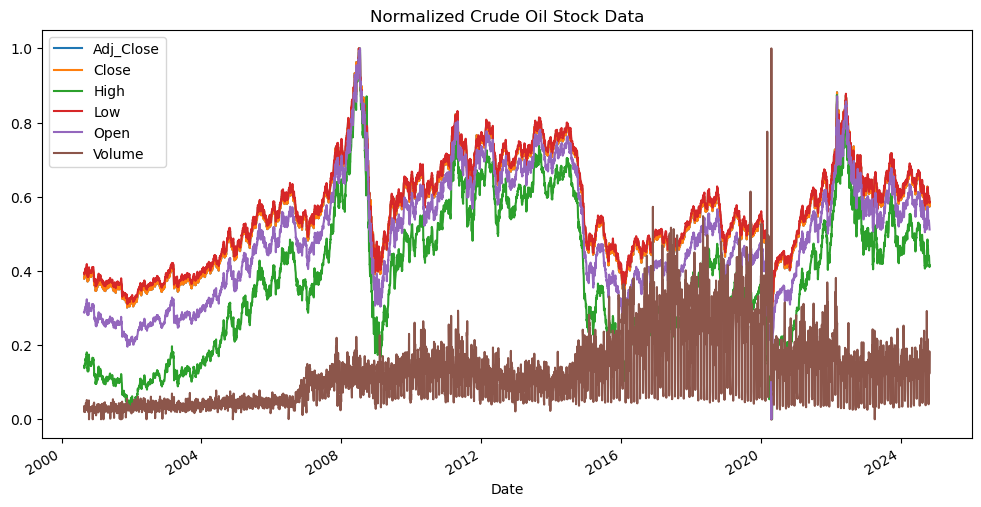

In [6]:
# Plot the normalized data to visualize trends over time

normalized_data.plot(figsize=(12, 6))
plt.title('Normalized Crude Oil Stock Data')
plt.show()

In [7]:
normalized_data

,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,
2000-08-23 00:00:00+00:00,0.380932,0.380932,0.143060,0.393756,0.288649,0.034693
2000-08-24 00:00:00+00:00,0.378635,0.378635,0.138868,0.390760,0.288335,0.031893
2000-08-25 00:00:00+00:00,0.380932,0.380932,0.137820,0.390324,0.287078,0.019491
2000-08-28 00:00:00+00:00,0.385414,0.385414,0.143959,0.393266,0.289214,0.020439
2000-08-29 00:00:00+00:00,0.384594,0.384594,0.144782,0.397080,0.294114,0.021471
...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,0.589438,0.589438,0.439063,0.599815,0.534079,0.125237
2024-10-25 00:00:00+00:00,0.598130,0.598130,0.435919,0.600850,0.529744,0.125507
2024-10-28 00:00:00+00:00,0.574076,0.574076,0.414059,0.584287,0.521264,0.183383


In [8]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6073 entries, 2000-08-23 00:00:00+00:00 to 2024-10-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj_Close  6073 non-null   float64
 1   Close      6073 non-null   float64
 2   High       6073 non-null   float64
 3   Low        6073 non-null   float64
 4   Open       6073 non-null   float64
 5   Volume     6073 non-null   float64
dtypes: float64(6)
memory usage: 332.1 KB


#### CluStream Algorithm

In [9]:
# Define CluStream parameters

n_micro_clusters=100
batch_size=400

In [10]:
# Online Phase: Create micro-clusters

online_kmeans=MiniBatchKMeans(n_clusters=n_micro_clusters, batch_size=batch_size, random_state=42)
online_kmeans.fit(normalized_data)

MiniBatchKMeans(batch_size=400, n_clusters=100, random_state=42)

In [11]:
# Store micro-cluster centers

micro_clusters=online_kmeans.cluster_centers_

In [12]:
# Offline Phase: Form macro-clusters

n_macro_clusters=5
offline_kmeans=MiniBatchKMeans(n_clusters=n_macro_clusters, random_state=42)
offline_kmeans.fit(micro_clusters)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [13]:
# Store macro-cluster centers

macro_clusters=offline_kmeans.cluster_centers_

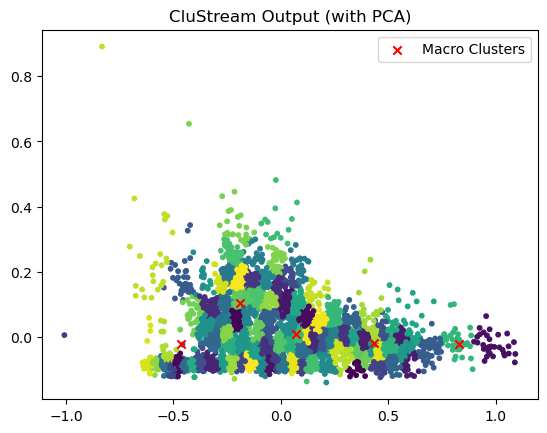

In [14]:
# Reduce data to 2D for visualization

pca=PCA(n_components=2)
data_2d=pca.fit_transform(normalized_data)
macro_clusters_2d=pca.transform(macro_clusters)

# Plot reduced data and macro-clusters

plt.scatter(data_2d[:, 0], data_2d[:, 1], c=online_kmeans.predict(normalized_data), s=10)
plt.scatter(macro_clusters_2d[:, 0], macro_clusters_2d[:, 1], color='red', marker='x', label='Macro Clusters')
plt.title('CluStream Output (with PCA)')
plt.legend()
plt.show()

#### K-means Clustering

In [15]:
# Choose number of clusters

n_clusters=5

In [16]:
# Apply K-means

kmeans=KMeans(n_clusters=n_clusters, random_state=42)
labels=kmeans.fit_predict(normalized_data)

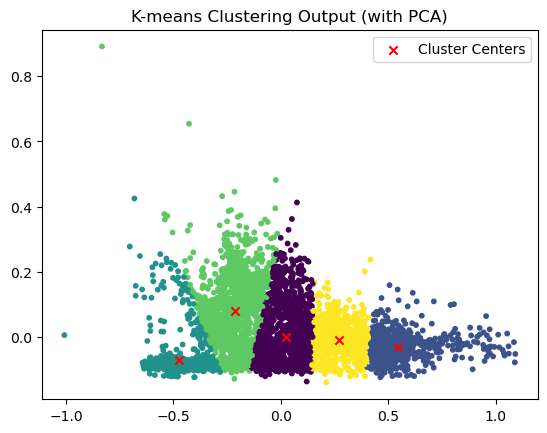

In [17]:
# Reduce data to 2D for visualization

pca=PCA(n_components=2)
data_2d=pca.fit_transform(normalized_data)
cluster_centers_2d=pca.transform(kmeans.cluster_centers_)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, s=10, cmap='viridis')
plt.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], color='red', marker='x', label='Cluster Centers')
plt.title('K-means Clustering Output (with PCA)')
plt.legend()
plt.show()

#### EVALUATE CLUSTER QUALITY

In [18]:
macro_labels=offline_kmeans.predict(micro_clusters)
s1=silhouette_score(micro_clusters, macro_labels)
print("CluStream Macro-Clusters Silhouette Score:", s1)
d1=davies_bouldin_score(micro_clusters, macro_labels)
print("CluStream Macro-Clusters Davies-Bouldin Index:", d1)

s_1=silhouette_score(normalized_data, labels)
print("K-means Silhouette Score:",s_1 )
d_1=davies_bouldin_score(normalized_data, labels)
print("K-means Davies-Bouldin Index:", d_1)

CluStream Macro-Clusters Silhouette Score: 0.3877340889578921
CluStream Macro-Clusters Davies-Bouldin Index: 0.7525412873490852
K-means Silhouette Score: 0.42284040685832375
K-means Davies-Bouldin Index: 0.786174610378013


####  CHANGING PARAMETERS

#### CluStream Algorithm

In [19]:
n_micro_clusters=150
batch_size=500

In [20]:
online_kmeans=MiniBatchKMeans(n_clusters=n_micro_clusters, batch_size=batch_size, random_state=50)
online_kmeans.fit(normalized_data)

MiniBatchKMeans(batch_size=500, n_clusters=150, random_state=50)

In [21]:
micro_clusters=online_kmeans.cluster_centers_

In [22]:
n_macro_clusters=10
offline_kmeans=MiniBatchKMeans(n_clusters=n_macro_clusters, random_state=50)
offline_kmeans.fit(micro_clusters)

MiniBatchKMeans(n_clusters=10, random_state=50)

In [23]:
macro_clusters=offline_kmeans.cluster_centers_

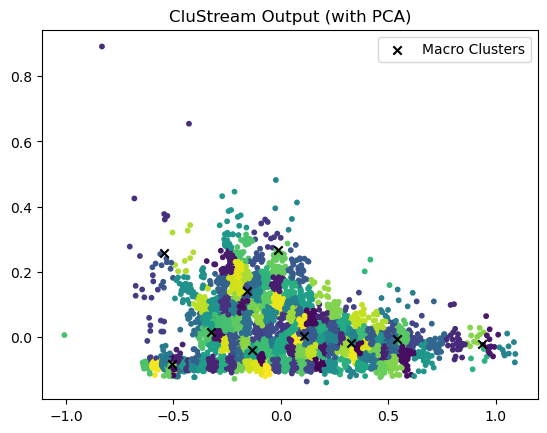

In [24]:
pca=PCA(n_components=2)
data_2d=pca.fit_transform(normalized_data)
macro_clusters_2d=pca.transform(macro_clusters)

plt.scatter(data_2d[:, 0], data_2d[:, 1], c=online_kmeans.predict(normalized_data), s=10)
plt.scatter(macro_clusters_2d[:, 0], macro_clusters_2d[:, 1], color='black', marker='x', label='Macro Clusters')
plt.title('CluStream Output (with PCA)')
plt.legend()
plt.show()

####  K-means Clustering

In [25]:
n_clusters=10

In [26]:
kmeans=KMeans(n_clusters=n_clusters, random_state=50)
labels=kmeans.fit_predict(normalized_data)

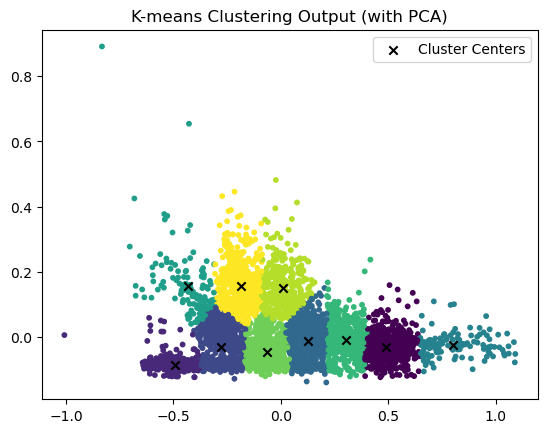

In [27]:
pca=PCA(n_components=2)
data_2d=pca.fit_transform(normalized_data)
cluster_centers_2d=pca.transform(kmeans.cluster_centers_)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, s=10, cmap='viridis')
plt.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], color='black', marker='x', label='Cluster Centers')
plt.title('K-means Clustering Output (with PCA)')
plt.legend()
plt.show()

#### EVALUATE CLUSTER QUALITY

In [28]:
macro_labels=offline_kmeans.predict(micro_clusters)
s2=silhouette_score(micro_clusters, macro_labels)
print("CluStream Macro-Clusters Silhouette Score:", s2)
d2=davies_bouldin_score(micro_clusters, macro_labels)
print("CluStream Macro-Clusters Davies-Bouldin Index:", d2)

s_2=silhouette_score(normalized_data, labels)
print("K-means Silhouette Score:",s_2)
d_2=davies_bouldin_score(normalized_data, labels)
print("K-means Davies-Bouldin Index:", d_2)

CluStream Macro-Clusters Silhouette Score: 0.38127444704479757
CluStream Macro-Clusters Davies-Bouldin Index: 0.745077890870974
K-means Silhouette Score: 0.43953771821244747
K-means Davies-Bouldin Index: 0.7240647694610353


#### COMPARISON GRAPHS

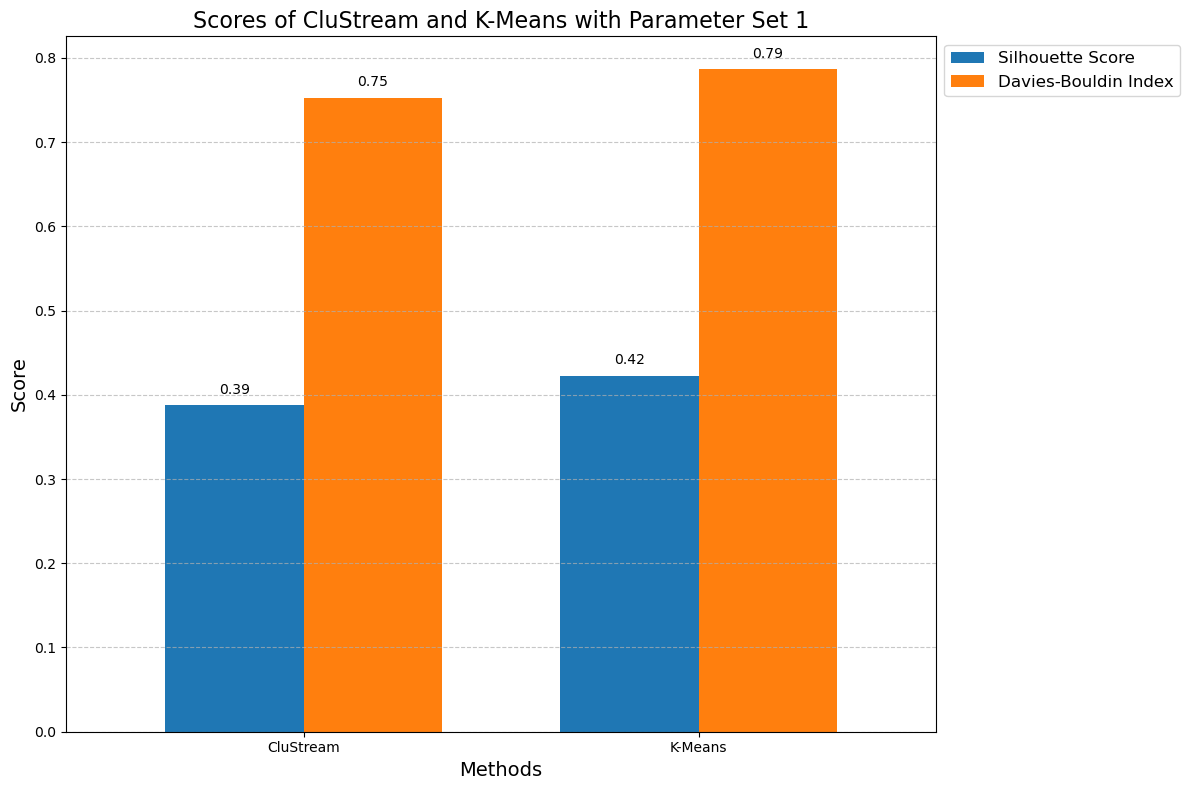

In [29]:
# Data for Silhouette Score and Davies-Bouldin Index for CluStream and K-Means

data1={
    'Silhouette Score': [s1, s_1],
    'Davies-Bouldin Index': [d1, d_1]
}


_df1=pd.DataFrame(data1, columns=['Silhouette Score', 'Davies-Bouldin Index'],
                    index=['CluStream', 'K-Means'])

# Plotting the bar chart

fig, ax=plt.subplots(figsize=(12, 8))
_df1.plot.bar(ax=ax, rot=0, color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.7)

# Adding labels to bars
def addlabels(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0: 
            ax.annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height + 0.01), 
                        ha='center', va='bottom', fontsize=10)

# Adding labels
addlabels(ax)

# Customizing the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Scores of CluStream and K-Means with Parameter Set 1", fontsize=16)
plt.xlabel("Methods", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

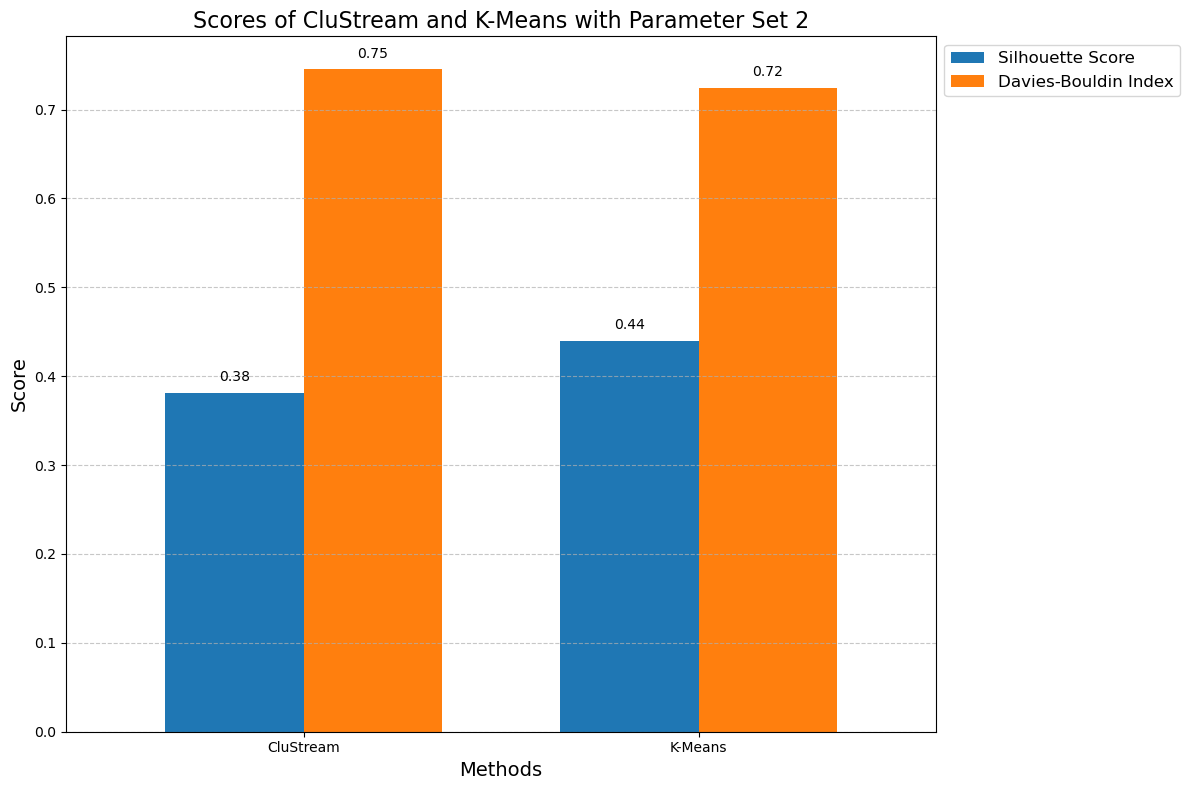

In [30]:
data2={
    'Silhouette Score': [s2, s_2],
    'Davies-Bouldin Index': [d2, d_2]
}


_df2=pd.DataFrame(data2, columns=['Silhouette Score', 'Davies-Bouldin Index'],
                    index=['CluStream', 'K-Means'])


fig, ax=plt.subplots(figsize=(12, 8))
_df2.plot.bar(ax=ax, rot=0, color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.7)

def addlabels(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0: 
            ax.annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height + 0.01), 
                        ha='center', va='bottom', fontsize=10)

addlabels(ax)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Scores of CluStream and K-Means with Parameter Set 2", fontsize=16)
plt.xlabel("Methods", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## THANK YOU